# Pymaceuticals Inc.
---

### Analysis

- Based on the results from the box plots, it is evident that the effectiveness of Capomulin and Ramicane is significantly higher compared to the Infubinol and Ceftamin. However, it is important to consider that Capomulin and Ramicane drug regimens have been tested in a greater number of mice, as displayed in bar charts. 

- The effectiveness of the Capomulin is also demonstrated by the Line graph, where the tumour size of the mouse “L509” drastically reduced from the 20 timepoint (days) onwards.

- The results from the scatter plot demonstrates a cluster/tendency that the heavier the mouse, the greater the tumour volume is. Hence, the regression model is very reliable according to the Pearson’s Correlation. R-value result of 0.84, represents a strong positive correlation. 

- Recommendation: Studies and tests of the Capomulin and Ramicane drug regimens should continue, and probably more investment should be put on these two. However, important attention is required on Infubinol drug regimen due to an outlier showed in the box plot. It is suggested to understand and review in what conditions this outlier data was collected to draw a conclusion on this point. 

## Prepare the data

In [655]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'])

# Display the data table for preview

merged_df.head()

# Set default style for plots

plt.style.use("default")

In [656]:
# Checking the number of mice

unique_mice_ids = len(merged_df["Mouse ID"].unique())
print(f'Unique mice IDs = {unique_mice_ids}')

merged_df['Mouse ID'].value_counts()

Unique mice IDs = 249


g989    13
i334    10
i738    10
a444    10
l725    10
        ..
t573     1
l872     1
x336     1
f932     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [657]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

search_duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
search_duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [658]:
# Getting all the data for the duplicate mouse ID

duplicate_mouse_ID = merged_df.loc[merged_df["Mouse ID"] == 'g989']
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [659]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID

clean_df = pd.DataFrame(merged_df.loc[merged_df["Mouse ID"] != 'g989'])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [660]:
# Checking the number of mice in the clean DataFrame

new_unique_mice_ids = len(clean_df["Mouse ID"].unique())
print(f'Unique mice IDs = {new_unique_mice_ids}')

clean_df["Mouse ID"].value_counts()

Unique mice IDs = 248


a685    10
y769    10
z578    10
b559    10
s185    10
        ..
t573     1
l872     1
x336     1
f932     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [661]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

column_in_study = 'Tumor Volume (mm3)'
group_drug_regimen = clean_df.groupby('Drug Regimen')

mean = group_drug_regimen[column_in_study].mean()
median = group_drug_regimen[column_in_study].median()
variance = group_drug_regimen[column_in_study].var()
std_dev = group_drug_regimen[column_in_study].std()
std_err = group_drug_regimen[column_in_study].sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean,
                                   'Median Tumor Volume': median,
                                   'Variance Tumor Volume': variance, 
                                   'Std. Dev. Tumor Volume': std_dev, 
                                   'Std. Err. Tumor Volume': std_err })

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [662]:
# Set data for plotting bar charts (based on timepoint)

data_timepoint = group_drug_regimen["Timepoint"].count().sort_values(ascending = False)
data_timepoint

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Timepoint, dtype: int64

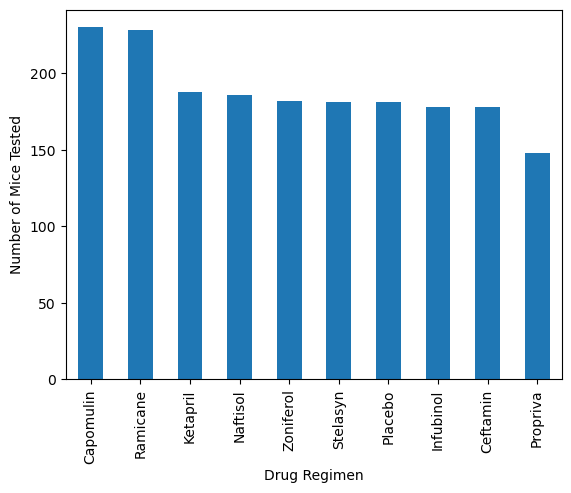

In [663]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
 
total_timepoints = data_timepoint.plot(kind="bar", legend=False)
total_timepoints.set_ylabel("Number of Mice Tested");

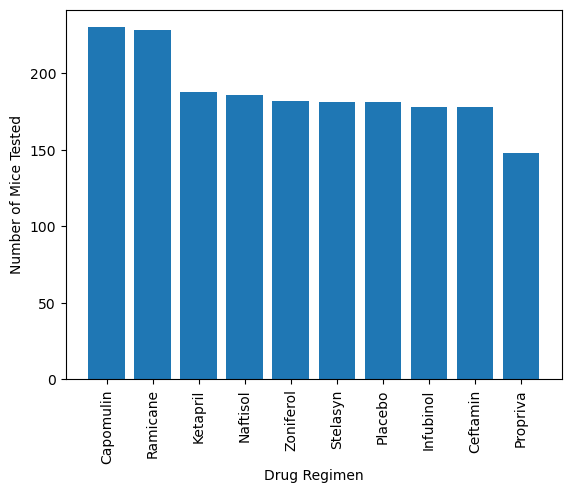

In [664]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

x_axis = data_timepoint.index
y_axis = data_timepoint

plt.bar(x_axis, y_axis)
plt.xticks(rotation= "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [665]:
# Set data for plotting pie charts (based on sex)

data_sex = clean_df['Sex'].value_counts()
data_sex

Male      958
Female    922
Name: Sex, dtype: int64

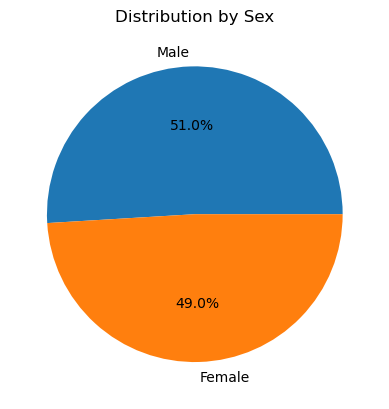

In [666]:
# Pie plot showing the distribution of female versus male mice using Pandas

sex = data_sex.plot.pie(autopct="%1.1f%%", title='Distribution by Sex')
sex.set_ylabel("");


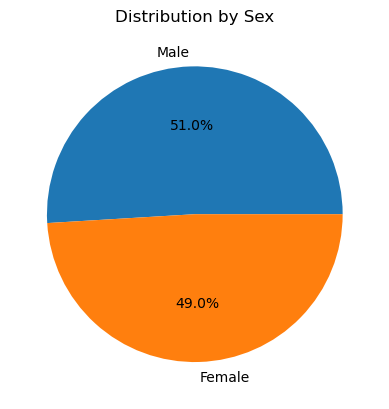

In [667]:
# Pie plot showing the distribution of female versus male mice using pyplot

labels = data_sex.index.values
plt.pie(data_sex, labels=labels, autopct="%1.1f%%")
plt.title("Distribution by Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [668]:
# Final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_last_greatest_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')["Timepoint"].
                                max()).reset_index()
mouse_last_greatest_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [669]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = pd.merge(clean_df, mouse_last_greatest_timepoint, 
                    on=("Mouse ID", "Timepoint"), how="right")
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [670]:
# Lists of treatments (for loop and labels), and empty list for tumor vol data

best_drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in best_drug_regimen:

    timepoint = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == drug]
    values_for_tumor_vol = timepoint['Tumor Volume (mm3)']
    tumor_vol.append(values_for_tumor_vol)

    # Quartiles, IQR, Bounds, and Potential Outliers

    print(f'{drug}:')

    quartiles = values_for_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    print(f'IQR is {iqr}')

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Lower Bound is {lower_bound}')
    print(f'Upper Bound is {upper_bound}')

    outliers = values_for_tumor_vol.loc[(values_for_tumor_vol >= upper_bound) | 
                                      (values_for_tumor_vol <= lower_bound)]
    print(f'Potential Outliers found are {outliers.count()}, info: {outliers}')

    print("------------------------------------------------------------------------------------------")

Capomulin:
IQR is 7.781863460000004
Lower Bound is 20.70456164999999
Upper Bound is 51.83201549
Potential Outliers found are 0, info: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------------------
Ramicane:
IQR is 9.098536719999998
Lower Bound is 17.912664470000003
Upper Bound is 54.30681135
Potential Outliers found are 0, info: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------------------
Infubinol:
IQR is 11.477135160000003
Lower Bound is 36.83290494999999
Upper Bound is 82.74144559000001
Potential Outliers found are 1, info: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------------------------------------
Ceftamin:
IQR is 15.577752179999997
Lower Bound is 25.355449580000002
Upper Bound is 87.66645829999999
Potential Outliers found are 0, info: Series([], Nam

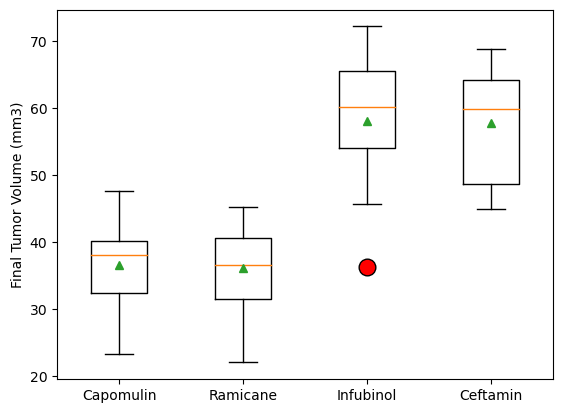

In [671]:
# Box plot that shows the distrubution of the tumor volume for each treatment group

outlier_format = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
plt.boxplot(tumor_vol, flierprops=outlier_format, showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], best_drug_regimen)
plt.show()


## Line and Scatter Plots

In [672]:
# Identify mouse treated with Capomulin

drug_regimen = "Capomulin"

drug_used_for_treatment = clean_df.loc[clean_df["Drug Regimen"] == drug_regimen]
drug_used_for_treatment["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

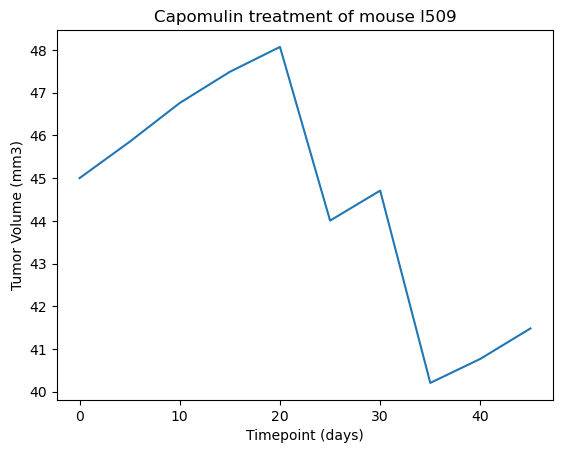

In [673]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id_chosen = "l509"

mouse_treated_info = drug_used_for_treatment.loc[drug_used_for_treatment["Mouse ID"] == 
                                                mouse_id_chosen]

x_axis = mouse_treated_info["Timepoint"]
y_axis = mouse_treated_info["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'{drug_regimen} treatment of mouse {mouse_id_chosen}')
plt.show()

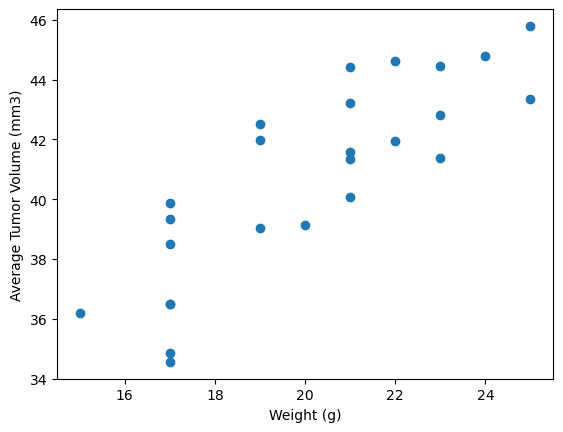

In [674]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

grouped_by_mouse_id = drug_used_for_treatment.groupby("Mouse ID") 

avg_tumor_vol = grouped_by_mouse_id["Tumor Volume (mm3)"].mean()
mouse_weight = grouped_by_mouse_id["Weight (g)"].first()

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
Regression model is y=0.95x+21.55


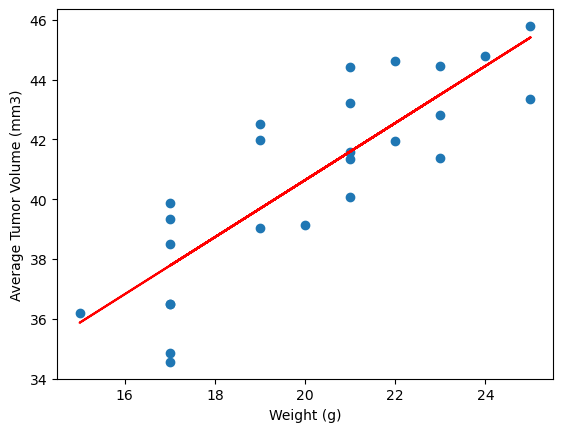

In [675]:
# Correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
print(f'The correlation between mouse weight and average tumor volume is {"{:.2f}".format(rvalue)}')
print(f'Regression model is y={"{:.2f}".format(slope)}x+{"{:.2f}".format(intercept)}')
plt.plot(mouse_weight, regress_values, "r-")


plt.show()